# 테이블 만들기

* 테이블은 표 형태로 구성된 2차원 구조, 행과 열로 구성되어 있다.
* 행은 로우(row)나 레코드(record)라고 부르며, 열은 컬럼(column)또는 필드(field)라고 부른다.
* 테이블은 마이크로소프트 엑셀시트와 비슷한 구조로 이루어져 있다.

## 데이터베이스와 테이블 생성하기

* 앞서 사용했던 회원 테이블과 구매 테이블은 다음과 같은 구조를 가진다.
* 평균 키는 TINYINT UNSIGNED를 사용해서 0 ~ 255범위로 지정

* 회원(member) 테이블의 구조

|열 이름(한글)|열 이름(영문)|데이터 형식|널 허용 안함(Not Null)|기타|
|---|---|---|---|---|
|아이디|mem_id|CHAR(8)|Yes|기본 키(PK)|
|회원 이름|mem_name|VARCHAR(10)|Yes||
|인원수|mem_number|TINYINT|Yes||
|주소|addr|CHAR(2)|Yes||
|연락처 국번|phone1|CHAR(3)|No||
|전화번호|phone2|CHAR(8)|No||
|평균 키|height|TINYINT|No|UNSIGNED|
|데뷔 일자|debute_date|DATE|No||

* 구매(buy) 테이블의 구조

|열 이름(한글)|열 이름(영문)|데이터 형식|널 허용 안함(Not Null)|기타|
|---|---|---|---|---|
|순번|num|INT|Yes|기본 키(PK), 자동 증가|
|아이디|mem_id|CHAR(8)|Yes|외래 키(FK)|
|제품 이름|prod_name|CHAR(6)|Yes||
|분류|group_name|CHAR(4)|No||
|가격|price|INT|Yes|UNSIGNED|
|수량|amount|SMALLINT|Yes|UNSIGNED|

## GUI 환경에서 테이블 만들기

### 데이터베이스 생성하기

In [ ]:
# 데이터베이스 생성
CREATE DATABASE naver_db;

* 생성된 데이터베이스 확인

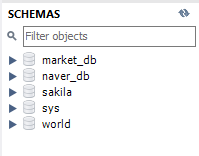

### 테이블 생성하기

* naver_db -> 확장하여 'Tables'를 선택 후 우클릭하여 Create Tables를 선택한다.
* 앞에서 설계한 대로 회원 테이블을 구성한다.

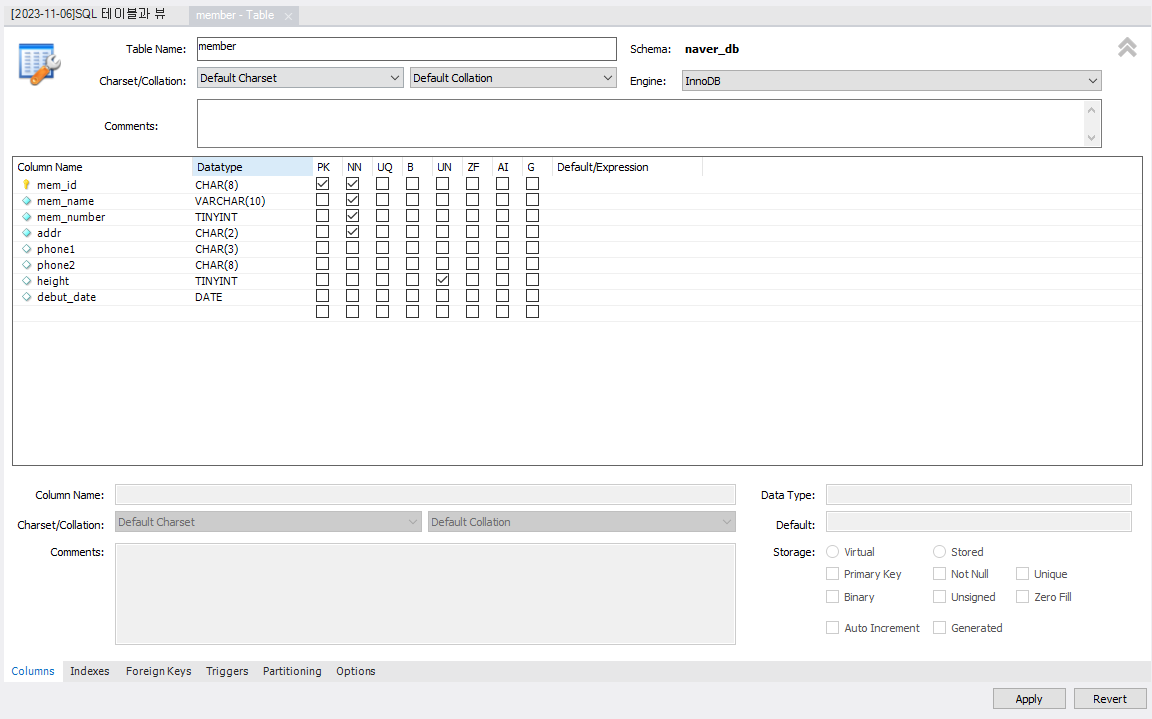

* Apply버튼을 누르면 다음과 같이 CREATE TABLE 코드를 확인할 수 있다.
* 자동으로 생성된 SQL의 테이블 이름, 열 이름 등은 백틱(`)으로 묶여있지만, 묶지 않아도 상관없다.
* 백틱(`): 테이블 이름이나 열 이름을 묶을 때 사용

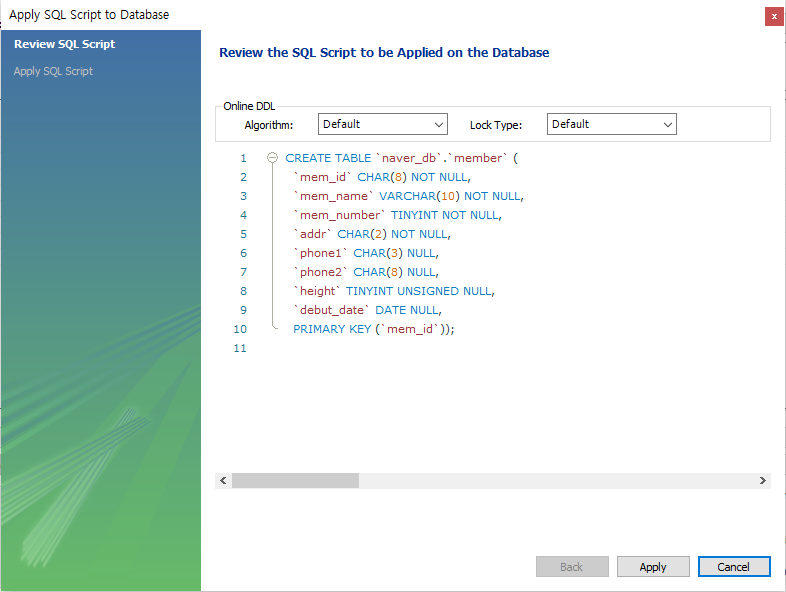

* 같은 방식으로 구매 테이블(buy)을 생성한다.
* 순번은 자동 증가(AUTO_INCREMENT)을 위해서 AI로 지정
* 가격과 수량은 음수가 들어가지 않아서 'UN'으로 처리

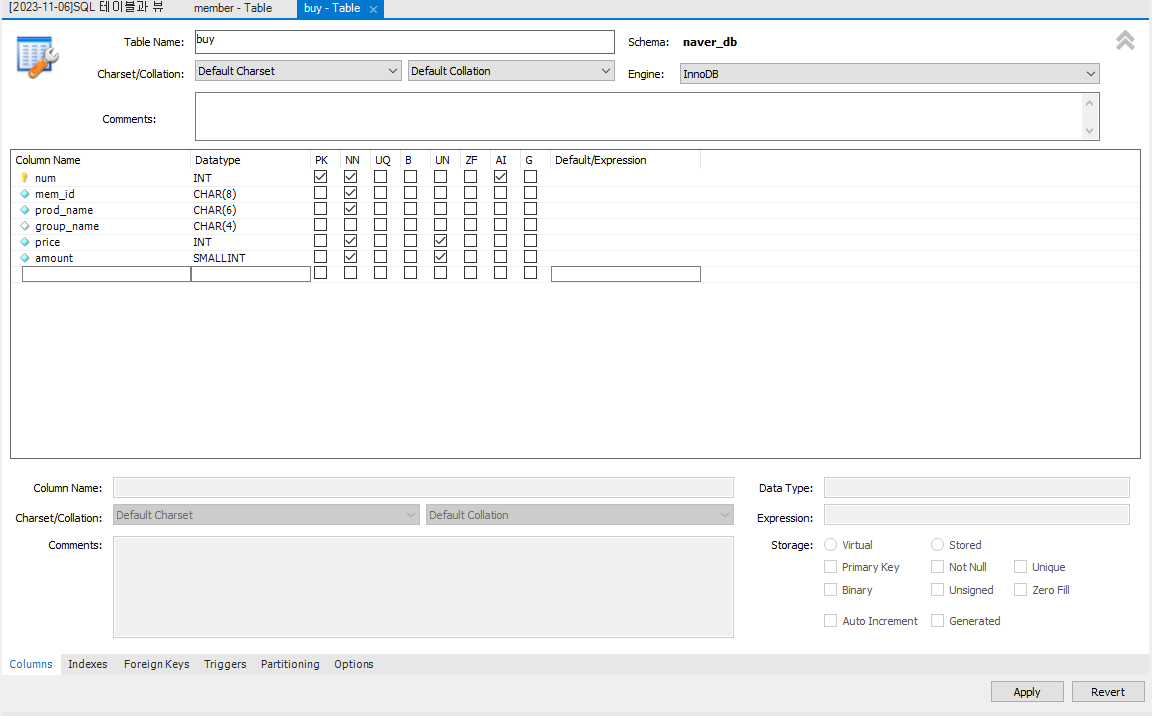

* GUI에서는 기본 키-외래 키 관계를 설정할 수 없다.
* APPLY창에서 다음과 같이 코드를 추가하여 수정해야 한다.
* FOREIGN KEY(mem_id) REFERENCES member(mem_id)

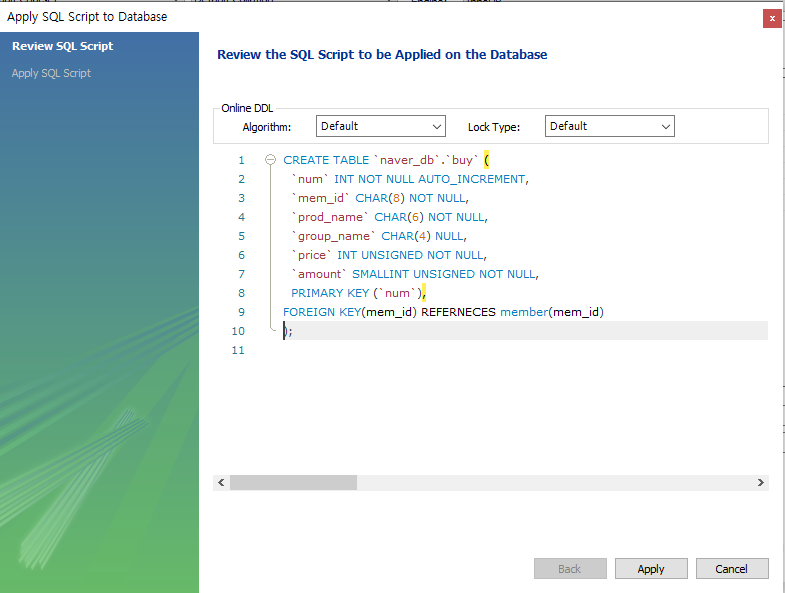

* 생성된 외래 키는 SCHEMAS 패널에서 확인할 수 있다.

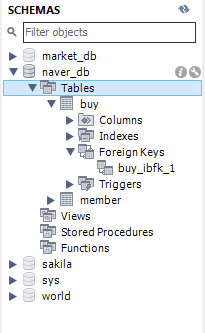

### 데이터 입력하기

* SCHEMAS 패널에서 naver_db-Tables-member를 선택하고 마우스 오른쪽 버튼 클릭, Select Rows-Limit1000을 선택한다.
* 선택하게 되면 다음과 같이 SELECT문이 자동으로 생성되고 Result Grid 창에 다음과 같은 결과도 보인다. 아직 데이터 입력 전이므로 행이 비어있다.

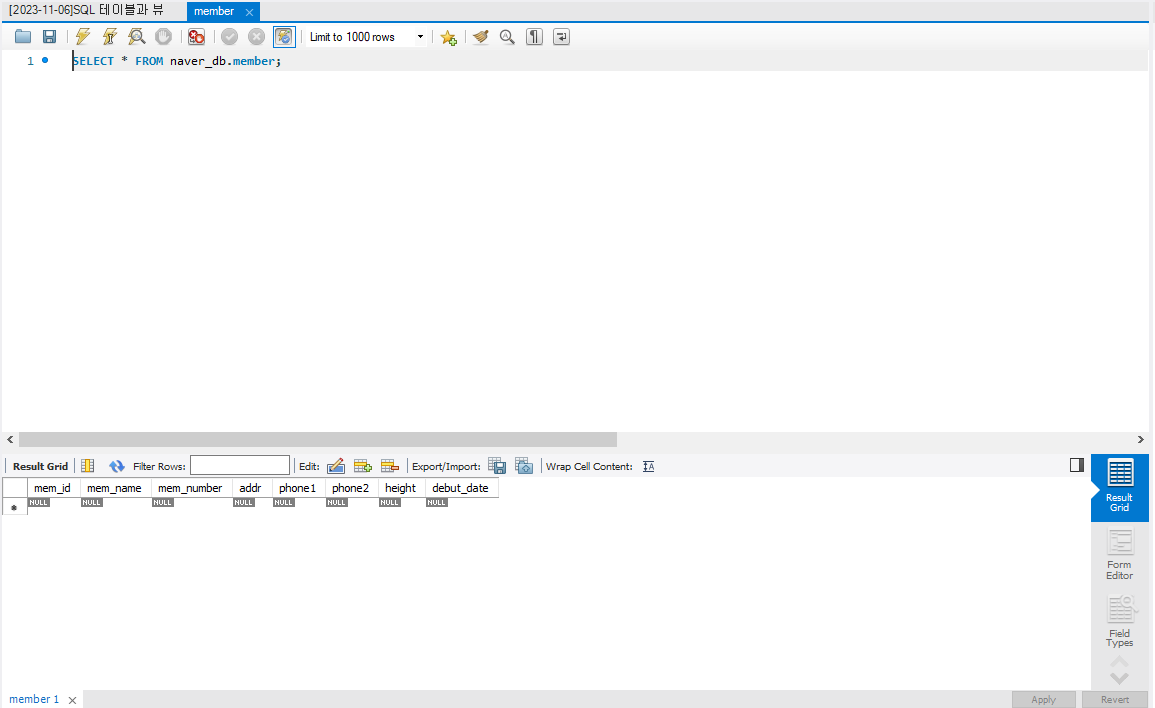

* insert new row 아이콘을 클릭하고 '네이버 쇼핑 DB 구성도'의 값을 3개 행만 입력한다.
* 입력 완료후엔 Apply-Finish버튼을 차례대로 클릭하여 적용 후, File-Close Tab 메뉴를 실행해서 SQL탭을 종료한다.

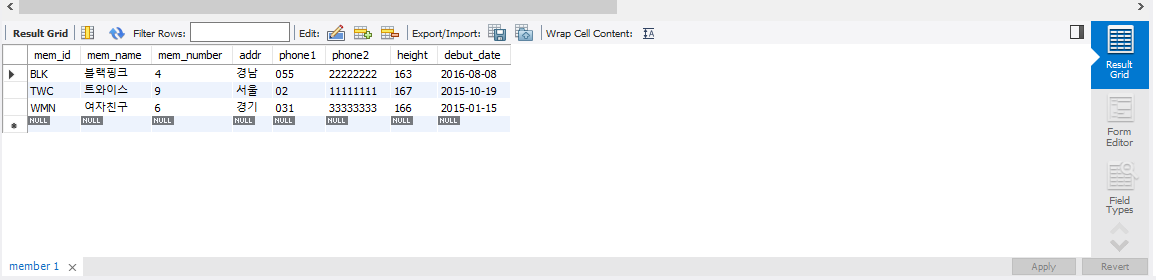

* 구매 테이블에도 동일하게 데이터를 입력해준다.

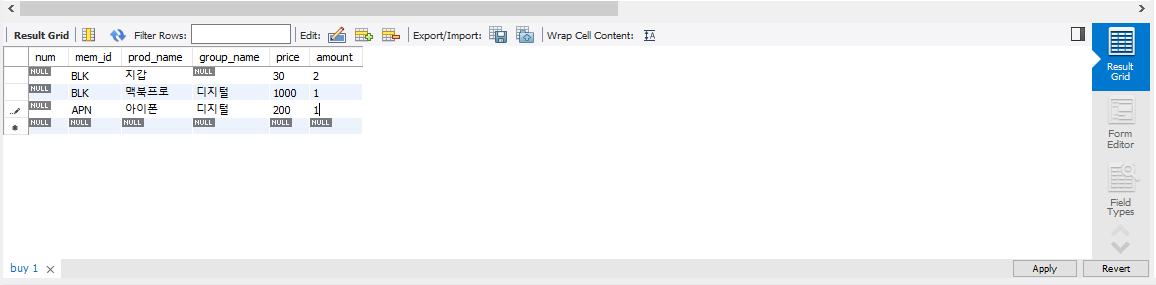

* 그러나 다음과 같은 오류가 발생한다.

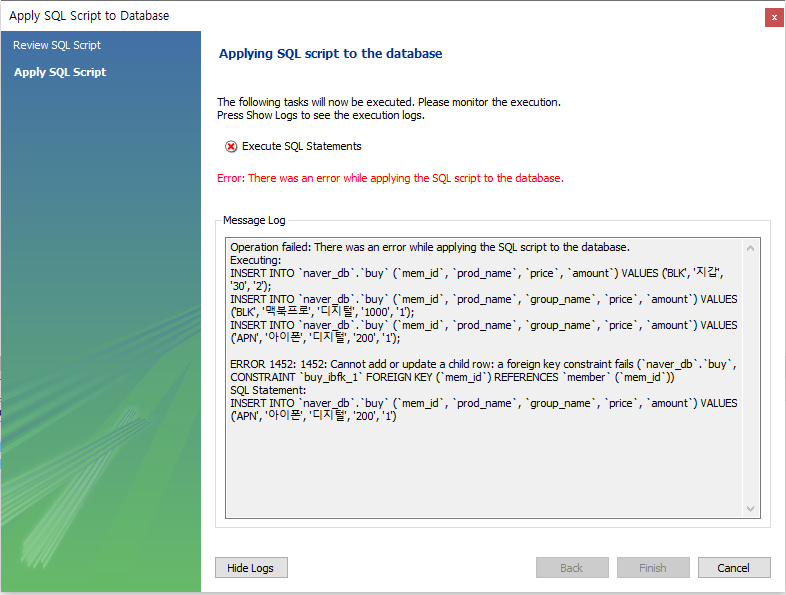

* '네이버 쇼핑DB 구성도'의 회원 테이블과 구매 테이블은 기본 키-외래 키로 연결되어 있다.
* 구매 테이블의 mem_id값은 반드시 회원 테이블의 mem_id로 존재해야 한다는 의미이다.
* 아직 회원 테이블에 APN(에이핑크)이라는 회원을 입력하지 않았음 -> 일단 CANCEL 버튼을 클릭하여 창을 종료한다.

* 물건을 구매하려면 먼저 회원가입을 해야한다. 즉, 아직 APN은 회원으로 가입하기 전인데 물건을 구매하려 한 것이다.
* 행을 삭제하기 위해 Result Grid 창에서 APN 앞의 빈 부분을 클릭해서 선택하고 마우스 오른쪽 버튼 우클릭 후 Delete Rows(s) 선택하고 Apply 진행
* Apply SQL Script 창에서 코드 확인 후 Apply-Finish 수행하여 2건의 입력을 마무리한다.

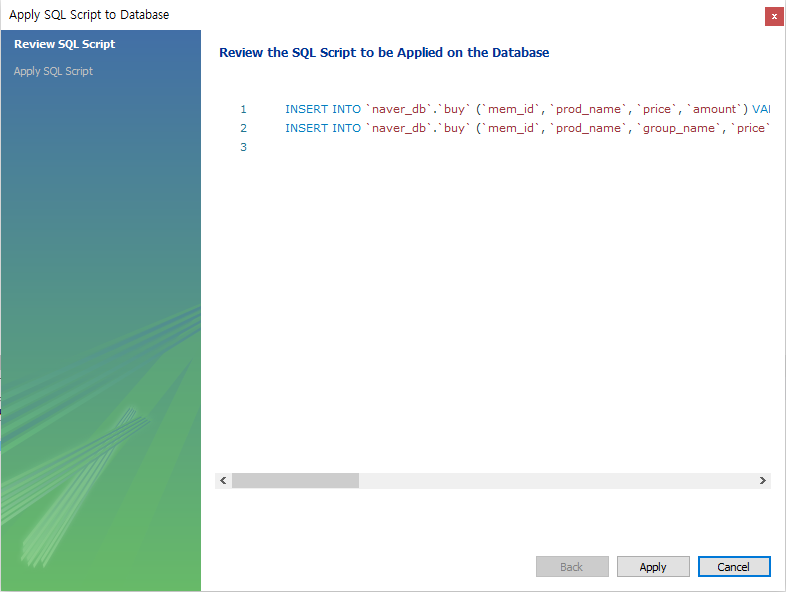

## SQL로 테이블 만들기

### 데이터베이스 생성하기

* naver_db를 삭제해주고 다새 생성한다. 이후 새로고침을 해준다.

In [ ]:
# 데이터베이스 생성, 기존의 naver_db삭제
DROP DATABASE IF EXISTS naver_db;
CREATE DATABASE naver_db;

In [ ]:
# 테이블 생성
USE naver_db;
DROP TABLE IF EXISTS member;
CREATE TABLE member
(mem_id CHAR(8), -- 회원 아이디(PK)
mem_name VARCHAR(10), -- 이름
mem_number TINYINT, -- 인원수
addr CHAR(2), -- 주소(경기, 서울, 경남 식으로 2글자만 입력
phone1 CHAR(3), -- 연락처의 국번(02, 031, 055 등)
phone2 CHAR(8), -- 연락처의 나머지 전화번호(하이픈 제외)
height TINYINT UNSIGNED, -- 평균 키
debut_date DATE -- 데뷔 일자
);

* 옵션을 추가해서 테이블을 다시 생성해준다.
* NULL 및 NOT NULL을 지정해서 테이블을 다시 생성

In [ ]:
# 옵션을 추가해서 테이블 재생성
# NULL은 빈 값을 혀용한다는 의미, NOT NULL은 반드시 값을 넣어야 한다는 의미이다.
USE naver_db;
DROP TABLE IF EXISTS member;
CREATE TABLE member
(mem_id CHAR(8) NOT NULL,
mem_name VARCHAR(10) NOT NULL,
mem_number TINYINT NOT NULL,
addr CHAR(2) NOT NULL,
phone1 CHAR(3) NULL,
phone2 CHAR(8) NULL,
height TINYINT UNSIGNED NULL,
debut_date DATE NULL
);

* 테이블에 기본 키를 설정해준다.
* 기본 키로 설정하기 위해서는 지정할 열 뒤에 PRIMARY KEY문을 붙여주면 된다.
* 기본 키로 지정된 열에는 NOT NULL을 생략해도 당연히 NOT NULL로 취급한다.(회원이면서 id가 없으면 안되므로)

In [ ]:
# 기본키 설정
USE naver_db;
DROP TABLE IF EXISTS member;
CREATE TABLE member
(mem_id CHAR(8) NOT NULL PRIMARY KEY,
mem_name VARCHAR(10) NOT NULL,
mem_number TINYINT NOT NULL,
addr CHAR(2) NOT NULL,
phone1 CHAR(3) NULL,
phone2 CHAR(8) NULL,
height TINYINT UNSIGNED NULL,
debut_date DATE NULL
);

* 구매 테이블도 동일하게 진행해준다.
* 외래 키를 제외하고 한 번에 SQL을 작성해본다.
* 주의할 점은 AUTO_INCREMENT로 지정한 열은 PRIMARY KEY나 UNIQUE로 꼭 지정해줘야 함

In [ ]:
# 구매 테이블 생성
DROP TABLE IF EXISTS buy; -- 기존에 있으면 삭제
CREATE TABLE buy -- 구매 테이블
(num INT AUTO_INCREMENT NOT NULL PRIMARY KEY, -- 순번(PK)
mem_id CHAR(8) NOT NULL, -- 아이디(FK)
prod_name CHAR(6) NOT NULL, -- 제품 이름
group_name CHAR(4) NULL, -- 분류
price INT UNSIGNED NOT NULL, -- 가격
amount SMALLINT UNSIGNED NOT NULL -- 수량
);

* 구매 테이블의 아이디 열을 회원 테이블의 아이디 열의 외래 키로 설정
* 마지막 열 뒤에 FOREIGN KEY(mem_id) REFERENCES member(mem_id)의 코드를 추가해준다.
* '이 테이블의 mem_id열을 member 테이블의 mem_id 열과 외래 키 관계로 연결해라'라는 의미이다.

In [ ]:
# 구매 테이블의 아이디 열을 회원 테이블의 아이디 열의 외래 키로 설정
DROP TABLE IF EXISTS buy; -- 기존에 있으면 삭제
CREATE TABLE buy -- 구매 테이블
(num INT AUTO_INCREMENT NOT NULL PRIMARY KEY, -- 순번(PK)
mem_id CHAR(8) NOT NULL, -- 아이디(FK)
prod_name CHAR(6) NOT NULL, -- 제품 이름
group_name CHAR(4) NULL, -- 분류
price INT UNSIGNED NOT NULL, -- 가격
amount SMALLINT UNSIGNED NOT NULL, -- 수량
FOREIGN KEY(mem_id) REFERENCES member(mem_id)
);

### 데이터 입력하기

In [ ]:
# 회원 테이블에 데이터 입력하기
INSERT INTO member VALUES('TWC', '트와이스', 9, '서울', '02', '11111111', 167, '2015-10-19');
INSERT INTO member VALUES('BLK', '블랙핑크', 4, '경남', '055', '22222222', 163, '2016-8-8');
INSERT INTO member VALUES('WMN', '여자친구', 6, '경기', '031', '33333333', 166, '2015-1-15');

In [ ]:
# 구매 테이블에 데이터 입력하기
INSERT INTO buy VALUES(NULL, 'BLK', '지갑', NULL, 30, 2);
INSERT INTO buy VALUES(NULL, 'BLK', '맥북프로', '디지털', 1000, 1);
INSERT INTO buy VALUES(NULL, 'APN', '아이폰', '디지털', 200, 1);

* GUI환경과 동일하게 세 번째 APN(에이핑크)은 아직 회원 테이블에 존재하지 않아서 오류가 발생한다.